In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

In [2]:
# set up solver
solver_config = dict(
    n=(64,),
    order=8,
    courant=0.79,
    snapshot_dt=0.1,
    num_snapshots=10,
)

# set up problem
problem_config = dict(
    u0="square",
    x=(0, 1),
    y=(0, 1),
    v=(2, 1),
    PAD=(0, 1),
    bc="periodic",
)

# set up slope limiter
limiter_config = dict(
    flux_strategy="gauss-legendre",
    apriori_limiting=True,
    mpp_lite=True,
    modify_time_step=True,
    mpp_tolerance=1e-12,
    SED=True,
)

# execute solver
solver = AdvectionSolver(
    **solver_config,
    **problem_config,
    **limiter_config,
    load=False,
)
solver.rkorder()

# print mpp violations
solver.report_mpp_violations()

New solution instance...


100%|█████████▉| 0.9999999999999999/1.0 [00:03]   



Wrote a solution up to t = 0.9999999999999999 located at data/solutions/square_periodic_None_(64,)_(0, 1)_(0, 1)_0_0.1_10_(2, 1)_0.79_8_gauss-legendre_True_True_False_moncen_False_False_False_False_True_1e-05_(0, 1)_None_False_True_1e-12_True_rk4_1.0.pkl


                       worst     frequency          mean
         upper  -2.36700e-13   2.34375e-02              
         lower  -5.38540e-13   8.20312e-02              
         total  -5.38540e-13   8.20312e-02   1.28524e-09



Plot solution

Text(0, 0.5, '$y$')

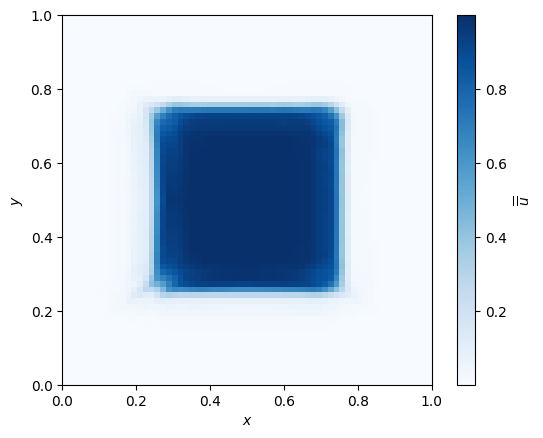

In [3]:
plt.imshow(np.flipud(solver.snapshots[-1]["u"]), extent=(0, 1, 0, 1), cmap="Blues")
plt.colorbar(label="$\overline{\overline{u}}$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Plot $1 - \theta$ for _a priori_ slope limiting

Text(0, 0.5, '$y$')

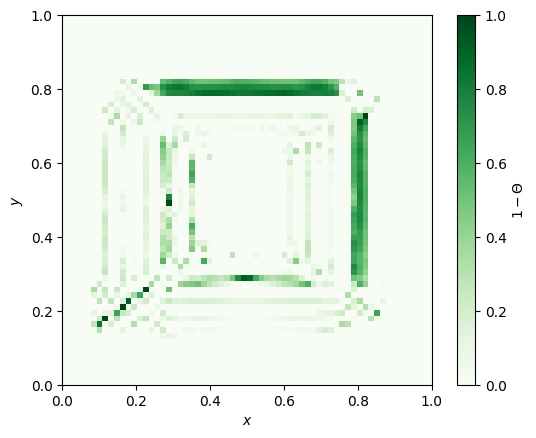

In [4]:
eps = 1e-3
hide_small_violations = np.logical_and(
    solver.snapshots[-1]["abs(M_ij - u)"] < eps,
    solver.snapshots[-1]["abs(m_ij - u)"] < eps,
)

plt.imshow(
    np.flipud(1 - np.where(hide_small_violations, 1, solver.snapshots[-1]["theta"])),
    extent=(0, 1, 0, 1),
    vmin=0,
    vmax=1,
    cmap="Greens",
)
plt.colorbar(label="$1 - \Theta$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Plot troubled cell inditator for _a posteriori_ slope limiting

Text(0, 0.5, '$y$')

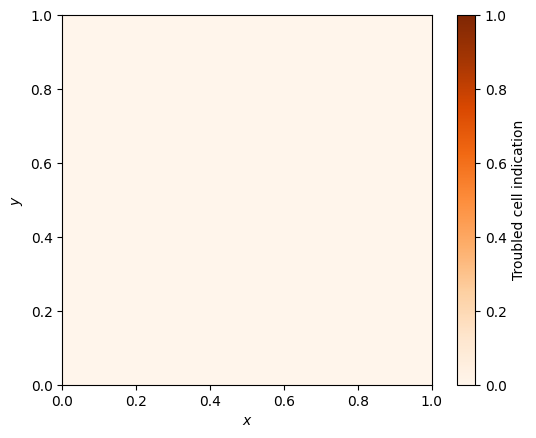

In [5]:
eps = 1e-5
hide_small_violations = np.logical_and(
    solver.snapshots[-1]["unew - M"] < eps,
    solver.snapshots[-1]["m - unew"] < eps,
)

plt.imshow(
    np.flipud(np.where(hide_small_violations, 0, solver.snapshots[-1]["trouble"])),
    extent=(0, 1, 0, 1),
    vmin=0,
    vmax=1,
    cmap="Oranges",
)
plt.colorbar(label="Troubled cell indication")
plt.xlabel("$x$")
plt.ylabel("$y$")